# 単回帰分析
(説明変数が1つ)

In [2]:
#データの準備

#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#データの読み込み
df=pd.read_excel("coffee.xlsx")
X=pd.DataFrame(df.iloc[:,[0]]).values
y=pd.DataFrame(df.iloc[:,[1]]).values

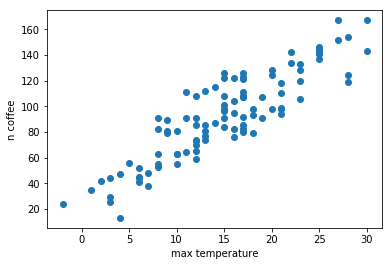

,MAX_TEMP,N_COFFEE
MAX_TEMP,1.000000,0.889654
N_COFFEE,0.889654,1.000000


In [3]:
#データの観察

#散布図の出力
plt.scatter(X,y)
plt.xlabel("max temperature")
plt.ylabel("n coffee")
plt.show()

#相関行列の出力
df.corr()

In [5]:
#データの分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                    test_size=0.3)

In [7]:
#データの学習
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

coef: [[4.26780601]]
intercept: [28.26911238]

R^2 train: 0.7754170116447434
R^2 test: 0.8177886245013108

adjusted R^2 train: 0.7721143206395191
adjusted R^2 test: 0.8112810753763576

RMSE train: 15.512635613830861
RMSE test: 15.14526384961476


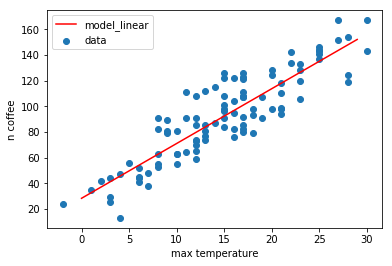

In [8]:
#モデルの確認・評価

#回帰係数の出力
print("coef:",model_linear.coef_)
print("intercept:",model_linear.intercept_)
print("")

#精度(決定係数)を出力
print("R^2 train:",model_linear.score(X_train,y_train))
print("R^2 test:",model_linear.score(X_test,y_test))
print("")

#精度(自由度調整済み決定係数)を出力
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
print("adjusted R^2 train:",
      adjusted(model_linear.score(X_train,y_train),len(X_train),1))
print("adjusted R^2 test:",
      adjusted(model_linear.score(X_test,y_test),len(X_test),1))
print("")

#精度(RMSE)の出力
from sklearn.metrics import mean_squared_error as mse
print("RMSE train:",mse(y_train,model_linear.predict(X_train))**(1/2))
print("RMSE test:",mse(y_test,model_linear.predict(X_test))**(1/2))

#回帰直線を散布図にプロット
plt.scatter(X,y,label="data")
x=np.arange(0,30,1)[:,np.newaxis]
plt.plot(x,model_linear.predict(x),color="red",label="model_linear")
plt.xlabel("max temperature")
plt.ylabel("n coffee")
plt.legend()
plt.show()

In [ ]:
⒍モデルの利用

In [13]:
#モデルを利用して予測を行う
max_temperature=18
model_linear.predict(18)

array([[105.08962062]])